### Data Preparation and Exploration

In [3]:
import pandas as pd
df = pd.read_csv("exchange_rate.csv")
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [4]:
df['date'] = pd.to_datetime(df['date'], format = "%d-%m-%Y %H:%M")
df

,date,Ex_rate
0,1990-01-01,0.785500
1,1990-01-02,0.781800
2,1990-01-03,0.786700
3,1990-01-04,0.786000
4,1990-01-05,0.784900
...,...,...
7583,2010-10-06,0.718494
7584,2010-10-07,0.721839
7585,2010-10-08,0.723197
7586,2010-10-09,0.720825


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     7588 non-null   datetime64[ns]
 1   Ex_rate  7588 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 118.7 KB


#### Initial Exploration: 

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

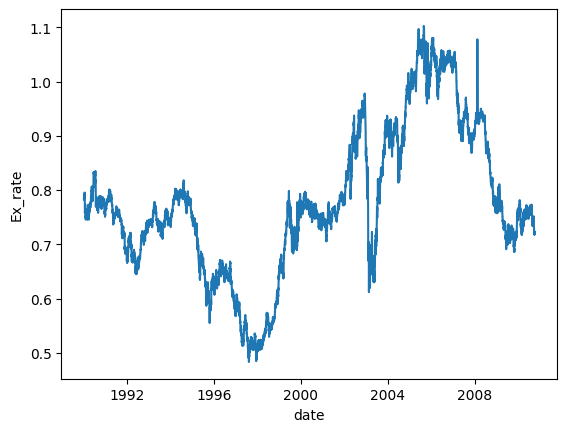

In [7]:
sns.lineplot(data=df, x='date', y='Ex_rate')
plt.show()

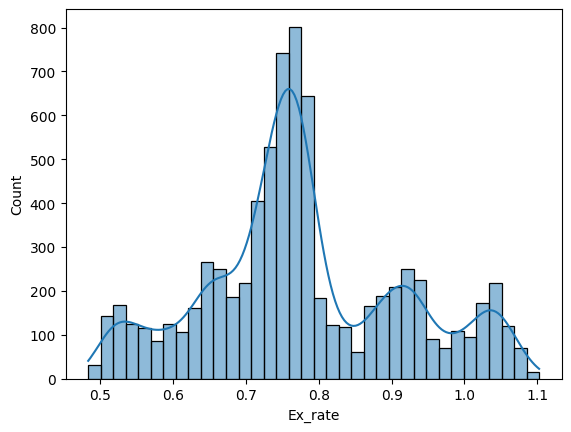

In [8]:
sns.histplot(data=df, x='Ex_rate', kde=True)
plt.show()

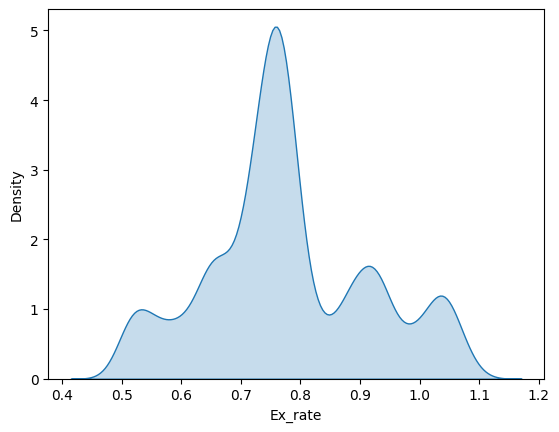

In [9]:
sns.kdeplot(x=df['Ex_rate'], fill=True)
plt.show()

#### Data Preprocessing:

In [10]:
 df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

<Axes: >

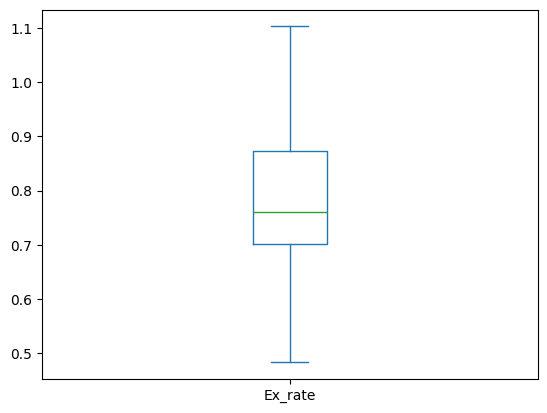

In [11]:
df["Ex_rate"].plot(kind="box")

#### Model Building - ARIMA

#### Parameter Selection for ARIMA: 

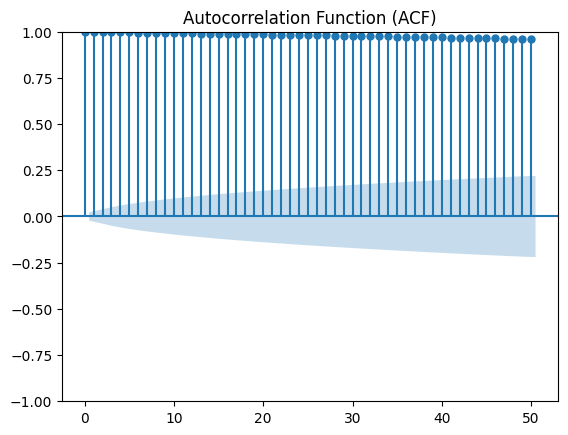

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Ex_rate'], lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.show()

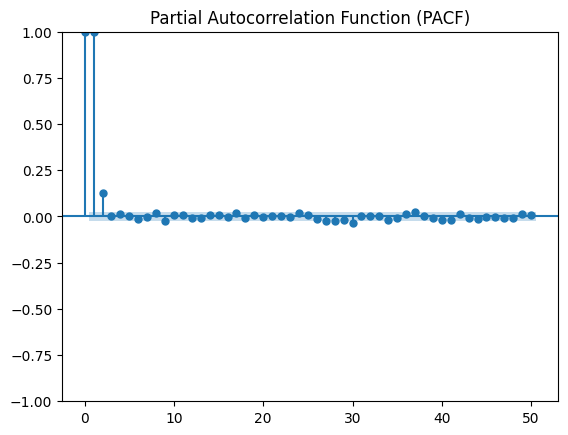

In [13]:
plot_pacf(df['Ex_rate'], lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [14]:
from statsmodels.tsa.stattools import acf
import pandas as pd

In [15]:
autocorrelation_values = acf(df['Ex_rate'], nlags=50)
print(autocorrelation_values)

[1.         0.99900849 0.99827478 0.9975089  0.99677862 0.99604054
 0.99528182 0.99452268 0.99380552 0.99303254 0.99228498 0.99154374
 0.99078662 0.99002017 0.98927157 0.98853032 0.98778114 0.98707019
 0.98633209 0.9856191  0.98489659 0.98417911 0.98346416 0.98274739
 0.98206353 0.98139042 0.98068485 0.97994433 0.97916979 0.97836795
 0.97751005 0.97667642 0.97584126 0.97501529 0.97414876 0.97327483
 0.97243587 0.97163749 0.97083472 0.97002109 0.96916784 0.96829494
 0.96745638 0.9666004  0.96572012 0.96483961 0.96395275 0.96305933
 0.96215233 0.96127304 0.96041117]


In [16]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

In [17]:
y = pd.to_numeric(df['Ex_rate'], errors='coerce')
y = y.dropna()
y = y.astype(float)

#### Model Fitting: 

In [18]:
# Fit an AR Model with lag1:
model = ARIMA(y, order=(1, 0, 0))
model_fitted = model.fit()
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 0, 0)   Log Likelihood               27990.980
Date:                Sun, 31 Aug 2025   AIC                         -55975.961
Time:                        16:58:23   BIC                         -55955.158
Sample:                             0   HQIC                        -55968.821
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7770      0.076     10.198      0.000       0.628       0.926
ar.L1          0.9990      0.000   2182.790      0.000       0.998       1.000
sigma2      3.656e-05   7.91e-08    462.438      0.000    3.64e-05    3.67e-05
===================================================================================
Ljung-Box (L1) (Q):                 129.97   Jarque-Bera (JB):           4155524.11
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.14   Skew:                            -0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                       117.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
#part-4
#1.Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.

In [20]:
#RMSE
rmse=np.sqrt(np.mean((model_fitted.resid)**2))
print("RMSE:", np.round(rmse,3))

RMSE: 0.006


In [21]:
#Fit an Moving Average Model with lag1:
model2 = ARIMA(y, order=(0, 0, 1))
model2_fitted = model2.fit()
display(model2_fitted.summary())
rmse2=np.sqrt(np.mean((model2_fitted.resid)**2))
print("RMSE:", np.round(rmse2,3))

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(0, 0, 1)   Log Likelihood                9328.990
Date:                Sun, 31 Aug 2025   AIC                         -18651.980
Time:                        16:58:25   BIC                         -18631.177
Sample:                             0   HQIC                        -18644.841
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7770      0.002    475.470      0.000       0.774       0.780
ma.L1          0.9657      0.003    307.109      0.000       0.960       0.972
sigma2         0.0050   9.02e-05     55.502      0.000       0.005       0.005
===================================================================================
Ljung-Box (L1) (Q):                6560.60   Jarque-Bera (JB):               124.76
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.41   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

RMSE: 0.071


In [22]:
#Fit an ARIMA Model with lag1:
model3 = ARIMA(y, order=(1, 0, 1))
model3_fitted = model3.fit()
display(model3_fitted.summary())
rmse3=np.sqrt(np.mean((model3_fitted.resid)**2))
print("RMSE:", np.round(rmse3,3))

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 0, 1)   Log Likelihood               28055.782
Date:                Sun, 31 Aug 2025   AIC                         -56103.563
Time:                        16:58:27   BIC                         -56075.826
Sample:                             0   HQIC                        -56094.044
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7770      0.089      8.711      0.000       0.602       0.952
ar.L1          0.9993      0.000   2311.171      0.000       0.998       1.000
ma.L1         -0.1311      0.002    -56.028      0.000      -0.136      -0.126
sigma2      3.595e-05   1.02e-07    351.072      0.000    3.57e-05    3.61e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2873781.68
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

RMSE: 0.006


#### Diagnostics

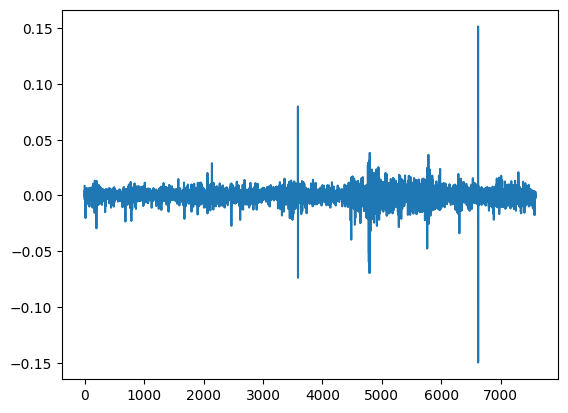

In [23]:
residuals = model_fitted.resid
plt.plot(residuals)
plt.show()

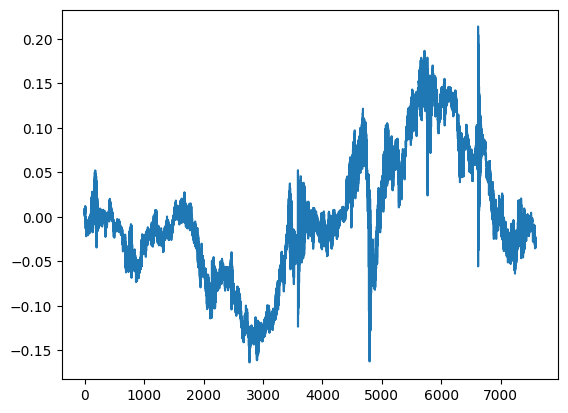

In [24]:
residuals2 = model2_fitted.resid
plt.plot(residuals2)
plt.show()

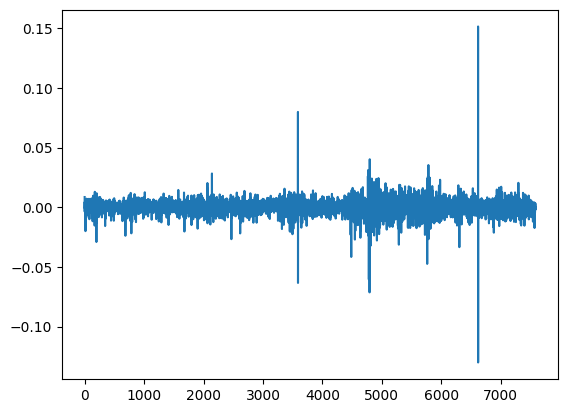

In [25]:
residuals3 = model3_fitted.resid
plt.plot(residuals3)
plt.show()

#### Forecasting: 

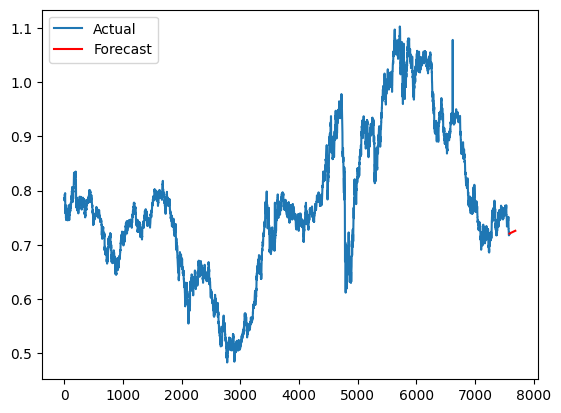

In [26]:
forecast_steps = 100
forecast = model_fitted.forecast(steps=forecast_steps)
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()

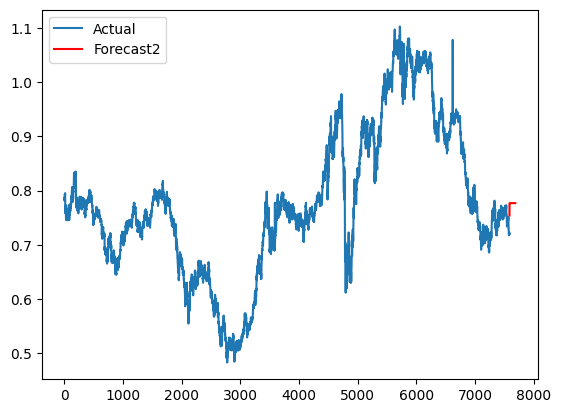

In [27]:
forecast_steps = 100
forecast2 = model2_fitted.forecast(steps=forecast_steps)
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(forecast2, label='Forecast2', color='red')
plt.legend()
plt.show()

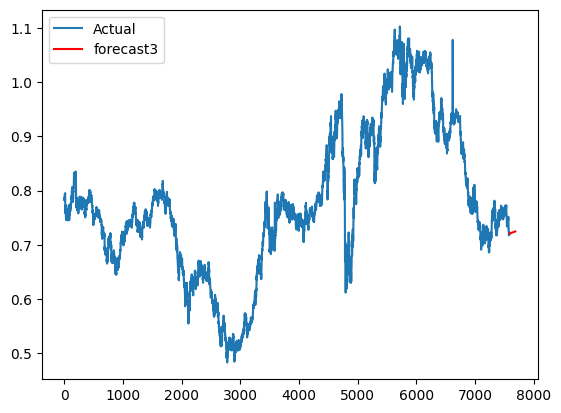

In [28]:
forecast_steps = 100
forecast3 = model3_fitted.forecast(steps=forecast_steps)
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(forecast3, label='forecast3', color='red')
plt.legend()
plt.show()

#### Model Building - Exponential Smoothing

#### Model Selection: 
We are going to opt for Holt's Linear Trend Model of all  Exponential Smoothing techniques , because the dataset has trend but seasonality is missing.

In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np
import itertools

In [30]:
model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal=None)
model_HLT = model.fit(optimized=True)

In [31]:
forecast = model_HLT.forecast(steps=100)

In [32]:
import numpy as np
rmse  = np.sqrt(np.mean(model_HLT.resid**2)) 
print("RMSE",np.round(rmse,2))

RMSE 0.01


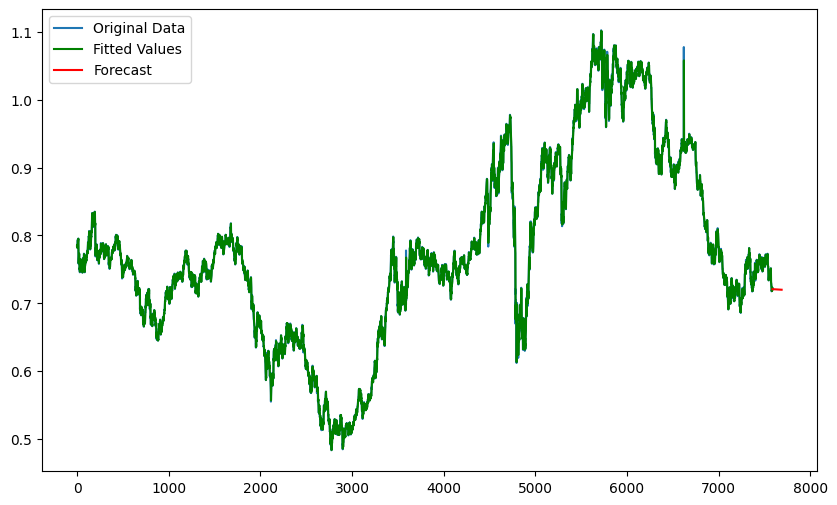

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Original Data')
plt.plot(model_HLT.fittedvalues, label='Fitted Values', color='green')
plt.plot(range(len(df), len(df) + 100), forecast, label='Forecast', color='red')
plt.legend()
plt.show()

#### Parameter Optimization: 

In [45]:
from statsmodels.tsa.holtwinters import Holt
import numpy as np
import itertools

def evaluate_holt_linear_model_aic(data, alpha, beta):
    try:
        model = Holt(data)
        model_fit = model.fit(
            smoothing_level=alpha,
            smoothing_trend=beta,
            optimized=False )
        return model_fit.aic
    except:
        return float('inf')

In [46]:
alpha_params = np.arange(0.1, 1.1, 0.1)
beta_params = np.arange(0.1, 1.1, 0.1)
best_aic_holt_linear = float('inf')
best_params_holt_linear_aic = None

In [47]:
for alpha in alpha_params:
    for beta in beta_params:
        aic = evaluate_holt_linear_model_aic(df['Ex_rate'], alpha, beta)
        if aic < best_aic_holt_linear:
            best_aic_holt_linear = aic
            best_params_holt_linear_aic = (alpha, beta)

#### Model Fitting and Forecasting: 

In [48]:
print(f"Best AIC for Holt's Linear trend model (full data): {best_aic_holt_linear}")
print(f"Best Parameters (alpha, beta) for Holt's Linear trend model (full data): {best_params_holt_linear_aic}")

Best AIC for Holt's Linear trend model (full data): -77266.80607257107
Best Parameters (alpha, beta) for Holt's Linear trend model (full data): (0.8, 0.1)


In [49]:
model2 = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal=None)
model2_HLT = model.fit(smoothing_level=0.8, smoothing_slope=0.1, optimized=False)

In [50]:
forecast2 = model2_HLT.forecast(steps=100)

In [51]:
rmse2  = np.sqrt(np.mean(model2_HLT.resid**2)) 
print("RMSE",np.round(rmse2,2))

RMSE 0.01


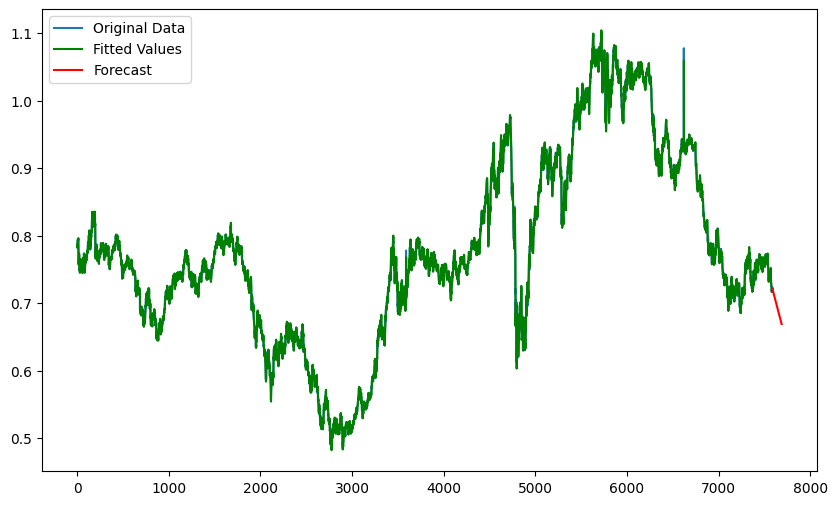

In [52]:
# Plotting the original data and the fitted/forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Original Data')
plt.plot(model2_HLT.fittedvalues, label='Fitted Values', color='green')
plt.plot(range(len(df), len(df) + 100), forecast2, label='Forecast', color='red')
plt.legend()
plt.show()

#### Evaluation and Comparison
Evaluation of all the models are already computed in the above.

#### Model Comparison: 
1. Both AR and ARIMA models produced  pretty much same results and are also accurate when compared with only Moving Average(MA).
2. In Exponential Smoothing Methods, Holt's Linear Trend Model is the best model than simple and Holt's Winter Trend Model as the data has trend but seasonality is missing.

#### Conclusion:
1. Holt's Linear Trend Model yielded the best performance for forecasting exchange rates as RMSE of this particular model is lowest.
2. ARIMA models failed to predict trend of future values accurately whereas Holt's Linear Trend Model does.